# Project: Investigate a DataSet(TMDB Movie Data)
## Table of Content
<ol>
    <li> Introduction </li>
    <li> Data Wrangling </li>
    <li> Exploratory Data Analysiis </li>
    <li> Conclusion </li>
</ol>

## 1 - Introduction
    I choose TMDB Movie DataSet which contain 10866 rows and 21 columns.
    
### Observation -
<ol>
    <li> Some of the Columns in the DataSet contain the Duplicates values. </li>
    <li> Some of the COlumns contains null values. </li>
    <li> Release date are not in the timedate format. </li>
    <li> There are some Extraneous Columns. </li>
</ol>

### Questions - 
<ol>
    <li> Which year has heighest number of movie released. </li>
    <li> Which year has heighest profit? </li>
    <li> Which director has heighest profit margin. </li>
</ol>

In [210]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## 2- Data Wrangling.


In [211]:
# checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [212]:
# Check for the number of column and rows



print( df.shape)

(10866, 21)


***So it has 10866 columns and 21 rows***

## Check for the Duplicate value

In [213]:
#checking for the duplicate value

sum(df.duplicated())

1

***It has 1 duplicated value***

## Now we Drop the Duplicate values.

In [214]:
# Now we drop the duplicate values.
df.drop_duplicates(inplace = True)

### Now we further check for the duplicate values. 

In [215]:
# Chheck for the duplicate values.
sum(df.duplicated())

0

***Now we Don't have any duplicate values.***

## Now we have to remove Extraneous Columns.

In [216]:
# We have some extranrous columns like homepage, cast, tagline, overview.

df.drop(['homepage', 'cast', 'tagline', 'overview'], axis = 1, inplace = True)

###  Now we further check .

In [217]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

***The Extraneous columns has been droped.***

## Now we have to change the Data type of release date.

In [218]:
# we to chnage the data type of release date into timedate formate.
df['release_date'] = pd.to_datetime(df['release_date'])

### Release date is converted to datetime data type.

In [219]:
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.5+ MB


## Now we have 1992 rows and 17 Columns.

# 3- Exploratory Data Analysis.

## Q1 - Which year has heighest number of movie released?

In [221]:
# Here we use groupy between release_year and movie to know which year has max movies released.

data = df.groupby('release_year').count()['id']
data

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

## Now we can clearly see that the year 2014 has max number of movies released.

# Now we can observe this by graph.

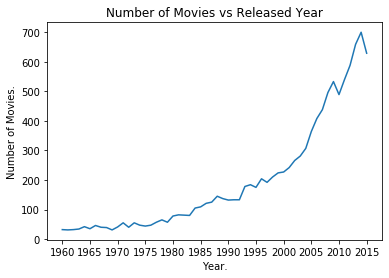

In [222]:
plt.xticks(np.arange(1960,2020,5))
plt.xlabel("Year.")
plt.ylabel("Number of Movies.")
plt.title("Number of Movies vs Released Year")
plt.plot(data)
plt.show()


***Now it is clearly visible from the above graph that year 2014 has max number movie released.***

## Q2 - Which year has heighest profit?

### First we find the profit.

In [225]:
#
df['profit'] = df['revenue'] - df['budget']
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: profit, Length: 10865, dtype: int64

In [228]:
# Then we take the mean and groupby release_year and profits.

data = df.groupby('release_year')['profit'].mean()
data

release_year
1960    3.842127e+06
1961    9.405909e+06
1962    5.026804e+06
1963    3.355103e+06
1964    7.178539e+06
1965    1.108219e+07
1966    5.909106e+05
1967    1.592956e+07
1968    4.943435e+06
1969    6.510580e+06
1970    1.056720e+07
1971    5.980247e+06
1972    1.146127e+07
1973    2.106891e+07
1974    1.565042e+07
1975    2.048207e+07
1976    1.444374e+07
1977    3.542111e+07
1978    1.785819e+07
1979    2.508738e+07
1980    1.802772e+07
1981    1.708352e+07
1982    2.494628e+07
1983    2.235527e+07
1984    1.815536e+07
1985    1.951424e+07
1986    1.899376e+07
1987    2.202119e+07
1988    1.940830e+07
1989    2.981947e+07
1990    3.049428e+07
1991    2.436366e+07
1992    3.486006e+07
1993    2.907597e+07
1994    2.644686e+07
1995    3.594547e+07
1996    2.266887e+07
1997    3.075045e+07
1998    2.377864e+07
1999    2.495749e+07
2000    2.302203e+07
2001    3.209975e+07
2002    3.289090e+07
2003    3.166685e+07
2004    3.134685e+07
2005    2.520206e+07
2006    2.198420e+07


***It is clear from above that year 1995 and 1997 has heighest profit.*** 

## Now we can observe this by graph. 

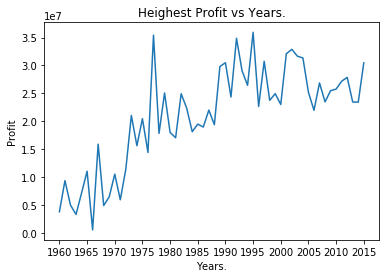

In [229]:
# We can visualized this by graph.

plt.xticks(np.arange(1960, 2020,5))
plt.xlabel("Years.")
plt.ylabel("Profit")
plt.title("Heighest Profit vs Years.")
plt.plot(data)
plt.show()

## Q 3 - Which director has heighest profit margin?

### First we take the profit margin?

In [230]:
df['profit'] = df['revenue'] - df['budget']
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: profit, Length: 10865, dtype: int64

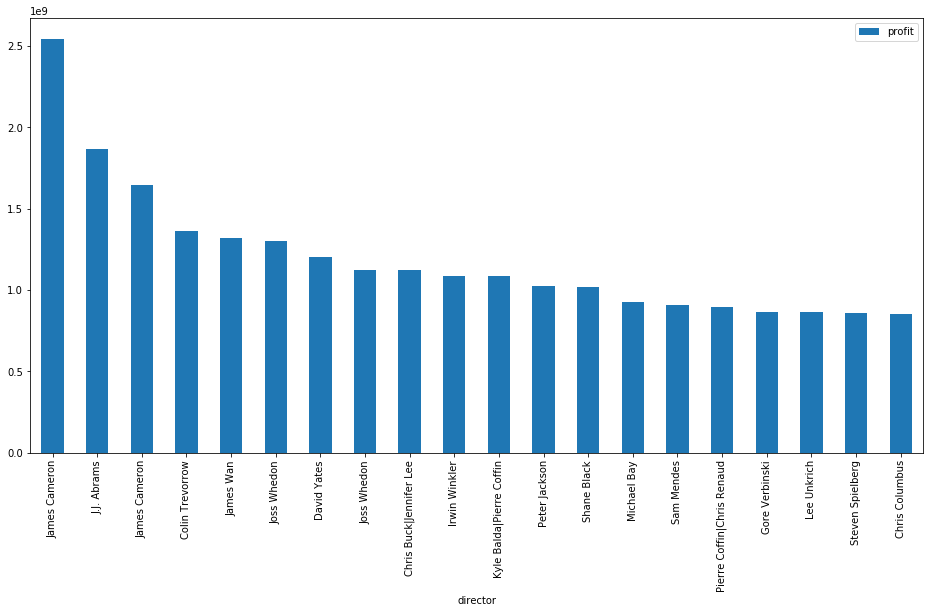

In [232]:
data  = pd.DataFrame(df[['director', 'profit']].sort_values(by = 'profit', ascending = False))
data[:20].plot(x ='director', y ='profit', kind = 'bar', figsize = (16,8) )

***From above its clear that Director james Cameron has heighest profit margin.***

# Conclusion -

<ol>
    <li> In year 2014  max number of movie is released. </li>
    <li> Year 1995 and 1997 has heighest profit. </li>
    <li> Director james Cameron has heighest profit margin. </li>
</ol>

    
        
    
